In [112]:
import pandas as pd

df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [113]:
df.sort_values('Speed')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False


In [114]:
df_gp = pd.DataFrame(df[['Generation', 'Speed']].groupby('Generation').sum().sort_values('Speed'))
df_gp

,Speed
Generation,
6,5448
2,6552
4,8632
3,10708
5,11233
1,12049


In [115]:
media = df_gp['Speed'].mean()
print('mediana Speed: ',df_gp['Speed'].median())

print('média Speed: ', media)

mediana Speed:  9670.0
média Speed:  9103.666666666666


# Trimmed Mean
Trimmed Mean calcula a mediana após desconsiderar uma porcentagem dos maiores e menores valores de um rol de dados. 

.drop(**labels**=[min, max], **axis**=(0: linha / 1: coluna), **inplace**=(True: substitui o dataframe original / False: Cria uma cópia))

In [116]:
trimm_mean = pd.DataFrame(df_gp.drop(labels=[1, 6], axis=0, inplace=False))
# ou df_gp.iloc[1: 5]
trimm_mean_int = trimm_mean.sum() / 4
print('média aparada: ', trimm_mean_int)
print('média amostral: ', df_gp['Speed'].mean())
trimm_mean

média aparada:  Speed    9281.25
dtype: float64
média amostral:  9103.666666666666


,Speed
Generation,
2,6552
4,8632
3,10708
5,11233


<AxesSubplot:ylabel='Density'>

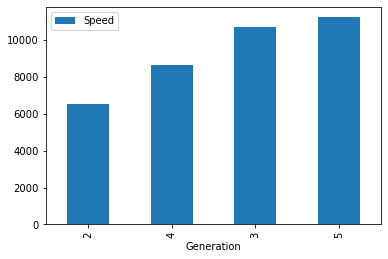

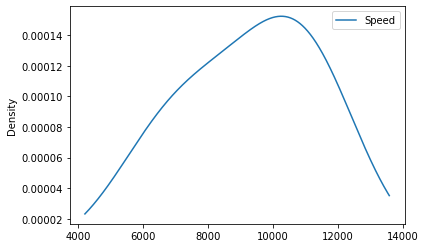

In [117]:
trimm_mean.plot(kind='bar')
trimm_mean.plot(kind='density')

# Medidas de Dispersão
Feita a partir do dataframe df_gp (df_generation_speed)

In [118]:
amplitude = int(df_gp['Speed'].max()) - int(df_gp['Speed'].min())
print('amplitude: ', amplitude)

amplitude:  6601


Desvio em relação a média

In [119]:
valores_speed = list(df_gp['Speed'])
sum = 0

for i in valores_speed:
    sum = sum + i
    print(f'[{i}]    ', round(i - media))


[5448]     -3656
[6552]     -2552
[8632]     -472
[10708]     1604
[11233]     2129
[12049]     2945
